In [293]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy import stats

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [294]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [295]:
# Selected recipes
s1 = pd.read_csv("./Pro_1/selectedrecipes.csv")
s2 = pd.read_csv("./Pro_2/selectedrecipes.csv")
s3 = pd.read_csv("./Pro_3/selectedrecipes.csv")


# Demographic
demo1 = pd.read_csv("./Pro_1/demographics.csv")
demo2 = pd.read_csv("./Pro_2/demographics.csv")
demo3 = pd.read_csv("./Pro_3/demographics.csv")
md = pd.concat([demo1, demo2, demo3])

In [296]:
# Add all data to one DF
ms = pd.concat([s1, s2, s3])

# Factoral analysis
* Determine if we can use the mean of the 3 questions

http://www.let.rug.nl/nerbonne/teach/rema-stats-meth-seminar/student-papers/MHof-QuestionnaireEvaluation-2012-Cronbach-FactAnalysis.pdf

In [362]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

choice_sat = ms[["choice_sat_q1","choice_sat_q2", "choice_sat_q3","choice_sat_q4","choice_sat_q5", "choice_sat_q6"]]

kmo_all,kmo_model=calculate_kmo(choice_sat)

fa = FactorAnalyzer(5)
fa.fit(choice_sat)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=choice_sat.columns)
print(kmo_all)
print('Factor Loadings \n%s' %loadings)


[0.74894639 0.57924798 0.69096371 0.73417146 0.67318925 0.66434595]
Factor Loadings 
               Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
choice_sat_q1  0.683589  0.043961  0.084034  0.023783  0.253381
choice_sat_q2  0.044861 -0.619727  0.294584  0.166537 -0.038164
choice_sat_q3  0.847218  0.029235  0.058127  0.008558 -0.054717
choice_sat_q4  0.635115 -0.089592 -0.191284  0.279430  0.026966
choice_sat_q5  0.027076  0.838350  0.095314  0.057938 -0.014752
choice_sat_q6 -0.025320 -0.125525  0.560802 -0.042232  0.020536


In [378]:
choice_sat = ms[["choice_sat_q1","choice_sat_q2", "choice_sat_q3"]]

kmo_all,kmo_model=calculate_kmo(choice_sat)

fa = FactorAnalyzer(2)
fa.fit(choice_sat)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=choice_sat.columns)
print(kmo_all)
print(kmo_model)
print('Factor Loadings \n%s' %loadings)


[0.50427198 0.70218281 0.50436666]
0.5070495257807768
Factor Loadings 
               Factor 1  Factor 2
choice_sat_q1  0.736774 -0.134843
choice_sat_q2  0.003396  0.217475
choice_sat_q3  0.842712  0.094095


In [377]:
choice_sat = ms[["choice_sat_q4","choice_sat_q5", "choice_sat_q6"]]

kmo_all,kmo_model=calculate_kmo(choice_sat)

fa = FactorAnalyzer(2)
fa.fit(choice_sat)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=choice_sat.columns)
print(kmo_all)
print(kmo_model)
print('Factor Loadings \n%s' %loadings)


[0.624015   0.55059786 0.56700716]
0.5706138944871872
Factor Loadings 
               Factor 1  Factor 2
choice_sat_q4  0.021641  0.451533
choice_sat_q5 -0.423644  0.245897
choice_sat_q6  0.588209  0.059159


## Cronbach’s Alpha
http://www.let.rug.nl/nerbonne/teach/rema-stats-meth-seminar/student-papers/MHof-QuestionnaireEvaluation-2012-Cronbach-FactAnalysis.pdf

In [368]:
import pingouin as pg

choice_sat = ms[["choice_sat_q1","choice_sat_q2", "choice_sat_q3","choice_sat_q4","choice_sat_q5", "choice_sat_q6"]]

pg.cronbach_alpha(data=choice_sat)

(0.27887282008534137, array([0.23 , 0.325]))

In [369]:
# Choice difficulty questions
choice_sat = ms[["choice_sat_q4","choice_sat_q5", "choice_sat_q6"]]

pg.cronbach_alpha(data=choice_sat)

(-0.4068228560536902, array([-0.514, -0.306]))

In [370]:
# Choice satisfaction questions
choice_sat = ms[["choice_sat_q1","choice_sat_q2", "choice_sat_q3"]]
pg.cronbach_alpha(data=choice_sat)

(0.22938496356041177, array([0.171, 0.284]))

# Get the variables

In [298]:
# Calculate mean for choice difficulty for each participant (DROP QUESTION 5: "5. It was easy to make this choice")
choice_dif1 = s1[["choice_sat_q4", "choice_sat_q6"]]
s1['choice_dif_mean'] = choice_dif1.mean(axis=1)

choice_dif2 = s2[["choice_sat_q4", "choice_sat_q6"]]
s2['choice_dif_mean'] = choice_dif2.mean(axis=1)

choice_dif3 = s3[["choice_sat_q4", "choice_sat_q6"]]
s3['choice_dif_mean'] = choice_dif3.mean(axis=1)

In [299]:
shown1 = s1
shown2 = s2
shown3 = s3 

# Condition 1 variants
s1v1 = shown1.loc[shown1['variant'] == 1]
s1v2 = shown1.loc[shown1['variant'] == 2] 
s1v3 = shown1.loc[shown1['variant'] == 3]

# Condition 2 variants
s2v1 = shown2.loc[shown2['variant'] == 1]
s2v2 = shown2.loc[shown2['variant'] == 2]
s2v3 = shown2.loc[shown2['variant'] == 3]

# Condition 3 variants
s3v1 = shown3.loc[shown3['variant'] == 1]
s3v2 = shown3.loc[shown3['variant'] == 2]
s3v3 = shown3.loc[shown3['variant'] == 3]


In [300]:
# Take the mean of the 3 choice difficulty questions for each participant
h1 = s1v3['choice_dif_mean'].to_numpy()
h2 = s2v3['choice_dif_mean'].to_numpy()
h3 = s3v3['choice_dif_mean'].to_numpy()

r1 = s1v2['choice_dif_mean'].to_numpy()
r2 = s2v2['choice_dif_mean'].to_numpy()
r3 = s3v2['choice_dif_mean'].to_numpy()

p1 = s1v1['choice_dif_mean'].to_numpy()
p2 = s2v1['choice_dif_mean'].to_numpy()
p3 = s3v1['choice_dif_mean'].to_numpy()

In [301]:
# EXCLUDE VEGANS
no_veg_id = md['user_id'].loc[md['restrictions'] != "vegan"].values

s1_no_veg = s1[s1['user_id'].isin(no_veg_id)]
s2_no_veg = s2[s2['user_id'].isin(no_veg_id)]
s3_no_veg = s3[s3['user_id'].isin(no_veg_id)]

s1_fsa_no_veg = s1_no_veg['choice_dif_mean'].to_numpy()
s2_fsa_no_veg = s2_no_veg['choice_dif_mean'].to_numpy()
s3_fsa_no_veg = s3_no_veg['choice_dif_mean'].to_numpy()

# Condition 1 variants 
s1v1_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 1]
s1v2_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 2]
s1v3_no_veg = s1_no_veg.loc[s1_no_veg['variant'] == 3]

# Condition 2 variants
s2v1_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 1]
s2v2_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 2]
s2v3_no_veg = s2_no_veg.loc[s2_no_veg['variant'] == 3]

# Condition 3 variants
s3v1_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 1]
s3v2_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 2]
s3v3_no_veg = s3_no_veg.loc[s3_no_veg['variant'] == 3]

# Choice difficulty for each variant
s1v1_fsa_no_veg = s1v1_no_veg['choice_dif_mean'].to_numpy()
s1v2_fsa_no_veg = s1v2_no_veg['choice_dif_mean'].to_numpy()
s1v3_fsa_no_veg = s1v3_no_veg['choice_dif_mean'].to_numpy()

s2v1_fsa_no_veg = s2v1_no_veg['choice_dif_mean'].to_numpy()
s2v2_fsa_no_veg = s2v2_no_veg['choice_dif_mean'].to_numpy()
s2v3_fsa_no_veg = s2v3_no_veg['choice_dif_mean'].to_numpy()

s3v1_fsa_no_veg = s3v1_no_veg['choice_dif_mean'].to_numpy()
s3v2_fsa_no_veg = s3v2_no_veg['choice_dif_mean'].to_numpy()
s3v3_fsa_no_veg = s3v3_no_veg['choice_dif_mean'].to_numpy()

In [302]:
# EXCLUDE ALLERGIES
no_allerg_id = md['user_id'].loc[md['restrictions'] != "allergies"].values

s1_no_allerg = s1[s1['user_id'].isin(no_allerg_id)]
s2_no_allerg = s2[s2['user_id'].isin(no_allerg_id)]
s3_no_allerg = s3[s3['user_id'].isin(no_allerg_id)]

s1_fsa_no_allerg = s1_no_allerg['choice_dif_mean'].to_numpy()
s2_fsa_no_allerg = s2_no_allerg['choice_dif_mean'].to_numpy()
s3_fsa_no_allerg = s3_no_allerg['choice_dif_mean'].to_numpy()

# Condition 1 variants 
s1v1_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 1]
s1v2_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 2]
s1v3_no_allerg = s1_no_allerg.loc[s1_no_allerg['variant'] == 3]

# Condition 2 variants
s2v1_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 1]
s2v2_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 2]
s2v3_no_allerg = s2_no_allerg.loc[s2_no_allerg['variant'] == 3]

# Condition 3 variants
s3v1_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 1]
s3v2_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 2]
s3v3_no_allerg = s3_no_allerg.loc[s3_no_allerg['variant'] == 3]

# Chice difficulty for each variant
s1v1_fsa_no_allerg = s1v1_no_allerg['choice_dif_mean'].to_numpy()
s1v2_fsa_no_allerg = s1v2_no_allerg['choice_dif_mean'].to_numpy()
s1v3_fsa_no_allerg = s1v3_no_allerg['choice_dif_mean'].to_numpy()

s2v1_fsa_no_allerg = s2v1_no_allerg['choice_dif_mean'].to_numpy()
s2v2_fsa_no_allerg = s2v2_no_allerg['choice_dif_mean'].to_numpy()
s2v3_fsa_no_allerg = s2v3_no_allerg['choice_dif_mean'].to_numpy()

s3v1_fsa_no_allerg = s3v1_no_allerg['choice_dif_mean'].to_numpy()
s3v2_fsa_no_allerg = s3v2_no_allerg['choice_dif_mean'].to_numpy()
s3v3_fsa_no_allerg = s3v3_no_allerg['choice_dif_mean'].to_numpy()

In [303]:
# Add all data to one DF
ms = pd.concat([s1, s2, s3])

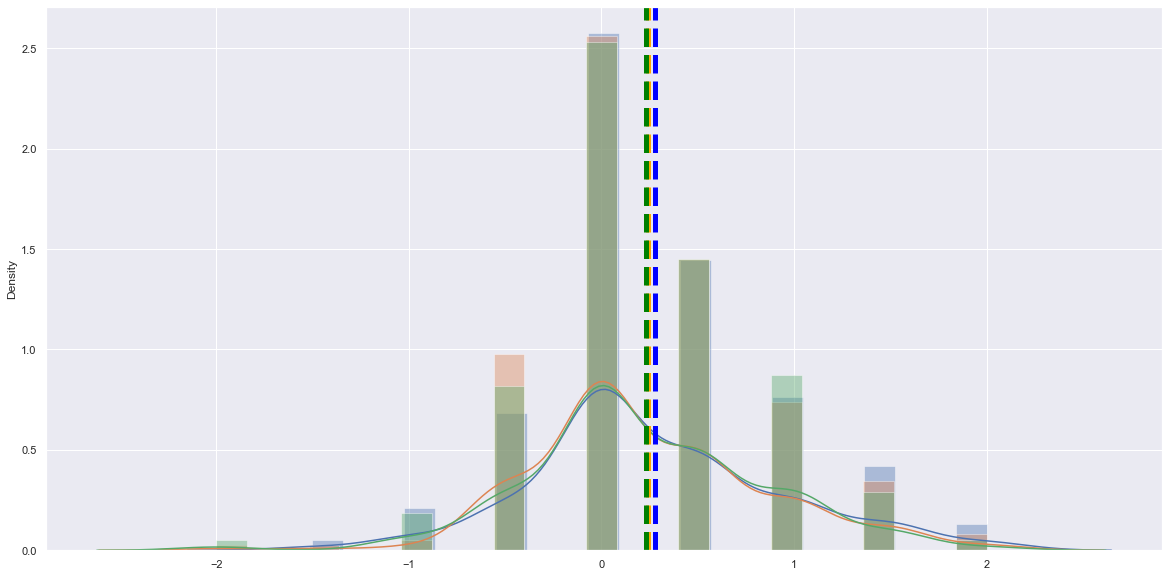

In [304]:
# Compare
plt.figure()
ax1 = sns.distplot(h1)
ax2 = sns.distplot(h2)
ax3 = sns.distplot(h3)
plt.axvline(np.mean(h1), color='blue', linestyle='dashed', linewidth=5)    # Nutri-score health rank
plt.axvline(np.mean(h2), color='orange', linestyle='dashed', linewidth=5)  # MTL health rank
plt.axvline(np.mean(h3), color='green', linestyle='dashed', linewidth=5)   # No-label health rank

# RQ2: Can the presence of a front-of-pack nutrition label in combination with a health ranking decrease choice difficulty?

Summary: 
1. 




Questions: 
* 4. I changed my mind several times before making a decision
* 5. It was easy to make this choice (this questions was not included) 
* 6. Making a choice was overwhelming

Answers:
Strongly disagree = -2
Disagree = 1
Neither disagree/agree = 0
Agree = 1
Strongly agree = 2

Choice difficulty: 
* -2 = Easy to make a choice
* 2 = Hard to make a choice

## Compare choice difficulty between conditions

In [255]:
f_oneway(s1['choice_dif_mean'], s2['choice_dif_mean'], s3['choice_dif_mean'])

F_onewayResult(statistic=5.219591308452267, pvalue=0.005479111237107037)

In [256]:
print(s1['choice_dif_mean'].mean()) # Nutriscore
print(s2['choice_dif_mean'].mean()) # MTL
print(s3['choice_dif_mean'].mean()) # No-label

0.3236953455571227
0.23980309423347398
0.23022598870056496


In [257]:
# Health ranking
print(stats.describe(h1))
print(stats.describe(h2))
print(stats.describe(h3))

DescribeResult(nobs=239, minmax=(-1.5, 2.0), mean=0.27824267782426776, variance=0.4170036215322949, skewness=0.3734251386600908, kurtosis=0.37448071132364946)
DescribeResult(nobs=237, minmax=(-2.0, 2.0), mean=0.24050632911392406, variance=0.3677590645784167, skewness=0.35854649479633915, kurtosis=0.8256883146730698)
DescribeResult(nobs=237, minmax=(-2.0, 2.0), mean=0.229957805907173, variance=0.3801580490595724, skewness=0.02444609405388088, kurtosis=0.9658839244785424)


In [260]:
# Random ranking
print(stats.describe(r1))
print(stats.describe(r2))
print(stats.describe(r3))

DescribeResult(nobs=236, minmax=(-1.0, 2.0), mean=0.3559322033898305, variance=0.38341146772448603, skewness=0.37088000157185874, kurtosis=-0.28699212055432755)
DescribeResult(nobs=237, minmax=(-2.0, 2.0), mean=0.22784810126582278, variance=0.3800686547951084, skewness=0.44191703385903847, kurtosis=1.159362786886068)
DescribeResult(nobs=234, minmax=(-1.0, 2.0), mean=0.2564102564102564, variance=0.34813469792010565, skewness=0.6681334905721634, kurtosis=0.5079659280452882)


In [261]:
# Popularity ranking
print(stats.describe(p1))
print(stats.describe(p2))
print(stats.describe(p3))

DescribeResult(nobs=234, minmax=(-0.5, 2.0), mean=0.33760683760683763, variance=0.3404680679358791, skewness=0.7014540697911607, kurtosis=0.0846008521050714)
DescribeResult(nobs=237, minmax=(-1.0, 2.0), mean=0.2510548523206751, variance=0.29157727240220277, skewness=0.662047853955256, kurtosis=0.4571436536563005)
DescribeResult(nobs=237, minmax=(-1.5, 2.0), mean=0.20464135021097046, variance=0.3276478581134234, skewness=0.6140753903808303, kurtosis=1.0734260894539691)


* There is a statisticaly significant difference in choice difficulty between the different conditions. 
* Overall choice difficulty is highest in the nutriscore condition and lowest in the No-label condition.
* This means that adding a Nutriscore labels increases choice difficulty, maybe because you have to process more information in order to make a choice? Or maybe you would like to select a certain recipe based on image/ingredients/title but nutriscore is really low so you reconsider. 


#### Condition 1: Nutriscore
* It looks like the Nutriscore label performed best when we combined a health ranking with the Nutriscore label. However there was no statistical significant difference in choice difficulty between health, popular and random ranking. 

#### Condition 2: MTL
* The MTL performed well overall, and there was not much of a difference in choice difficulty when combined with different ranking. However there was no statistical significant difference in choice difficulty between health, popular and random ranking.

#### Condition 3: No-label
* Choice difficulty was the lowest for no-label combined with popularity ranking! However there was no statistical significant difference in choice difficulty between health, popular and random ranking.
* 


In [269]:
f_oneway(h1, r1, p1)

F_onewayResult(statistic=1.0304484682548989, pvalue=0.357382947979928)

In [268]:
f_oneway(h2, r2, p2)

F_onewayResult(statistic=0.09235241502683346, pvalue=0.9117947486370213)

In [267]:
f_oneway(h3, r3, p3)

F_onewayResult(statistic=0.4482787113404853, pvalue=0.6389085737498679)

# Compare Health ranking scenario

In [262]:
# Compare NS/ MTL with No-label 
# H1 = Condition 1 Nutriscore Health ranking
# H2 = Condition 2 MTL Health ranking
# H3 = Condition 3 No-label Health ranking

In [270]:
print(stats.describe(h1))
print(stats.describe(h2))
print(stats.describe(h3))

DescribeResult(nobs=239, minmax=(-1.5, 2.0), mean=0.27824267782426776, variance=0.4170036215322949, skewness=0.3734251386600908, kurtosis=0.37448071132364946)
DescribeResult(nobs=237, minmax=(-2.0, 2.0), mean=0.24050632911392406, variance=0.3677590645784167, skewness=0.35854649479633915, kurtosis=0.8256883146730698)
DescribeResult(nobs=237, minmax=(-2.0, 2.0), mean=0.229957805907173, variance=0.3801580490595724, skewness=0.02444609405388088, kurtosis=0.9658839244785424)


In [271]:
f_oneway(h1, h2, h3)

F_onewayResult(statistic=0.3953672598078912, pvalue=0.6735808399024461)

In [272]:
# Without vegetarians 
f_oneway(s1v3_fsa_no_veg, s2v3_fsa_no_veg, s3v3_fsa_no_veg)

F_onewayResult(statistic=0.04538205014189114, pvalue=0.9556353034653796)

In [273]:
# Without allergies 
f_oneway(s1v3_fsa_no_allerg, s2v3_fsa_no_allerg, s3v3_fsa_no_allerg)

F_onewayResult(statistic=0.3034659509664052, pvalue=0.7383514121202615)

In [274]:
stats.ttest_ind(h1, h2)

Ttest_indResult(statistic=0.6570794153475852, pvalue=0.5114487636074279)

In [275]:
stats.ttest_ind(h1, h3)

Ttest_indResult(statistic=0.8342191964755581, pvalue=0.40457768973189745)

In [276]:
stats.ttest_ind(h2, h3)

Ttest_indResult(statistic=0.18777557489519695, pvalue=0.8511332795085053)

In [280]:
print(h1.mean())
print(h2.mean())
print(h3.mean())

0.27824267782426776
0.24050632911392406
0.229957805907173


* No significant statistical difference in Choice difficulty when front-of-pack nutrition label is presented in combination with a health ranking. 
* Choice difficulty is lowest with No-label. 

# What about random ranking? 

In [24]:
f_oneway(r1, r2, r3)

F_onewayResult(statistic=2.2278508498454945, pvalue=0.10850834380018827)

In [25]:
# Without vegetarians 
f_oneway(s1v2_fsa_no_veg, s2v2_fsa_no_veg, s3v2_fsa_no_veg)

F_onewayResult(statistic=0.7828605085218985, pvalue=0.45751931375013444)

In [26]:
# Without allergies 
f_oneway(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

F_onewayResult(statistic=2.322283162183532, pvalue=0.09879485677649076)

In [ ]:
# All

In [36]:
stats.ttest_ind(r1, r2)

Ttest_indResult(statistic=1.739629577644562, pvalue=0.08255846960784041)

In [37]:
stats.ttest_ind(r1, r3)

Ttest_indResult(statistic=1.829555498268259, pvalue=0.06793525958378162)

In [38]:
stats.ttest_ind(r2, r3)

Ttest_indResult(statistic=0.05548791539128661, pvalue=0.9557726546797095)

In [ ]:
# Without vegans

In [27]:
stats.ttest_ind(s1v2_fsa_no_veg, s2v2_fsa_no_veg)

Ttest_indResult(statistic=0.9765109428296359, pvalue=0.32934911824536894)

In [28]:
stats.ttest_ind(s1v2_fsa_no_veg, s3v2_fsa_no_veg)

Ttest_indResult(statistic=1.1647046473617992, pvalue=0.24477689620409274)

In [31]:
stats.ttest_ind(s2v2_fsa_no_veg, s3v2_fsa_no_veg)

Ttest_indResult(statistic=0.1584915281971691, pvalue=0.8741405959362882)

In [ ]:
# Without allergies

In [34]:
stats.ttest_ind(s1v2_fsa_no_allerg, s2v2_fsa_no_allerg)

Ttest_indResult(statistic=1.8132687594293928, pvalue=0.07042005489762634)

In [35]:
stats.ttest_ind(s1v2_fsa_no_allerg, s3v2_fsa_no_allerg)

Ttest_indResult(statistic=1.8627586183044353, pvalue=0.06312120949012462)

In [36]:
stats.ttest_ind(s2v2_fsa_no_allerg, s3v2_fsa_no_allerg)

Ttest_indResult(statistic=0.017289622852268934, pvalue=0.9862128545799282)

In [281]:
print(r1.mean())
print(r2.mean())
print(r3.mean())

0.3559322033898305
0.22784810126582278
0.2564102564102564


* No significant statistical difference in Choice difficulty when front-of-pack nutrition label is presented in combination with a random ranking. 
* Choice difficulty is lowest with MTL combined with random ranking. 
* Choice difficulty is highest with Nutriscore combined with random ranking. 

# What about popular ranking? 

In [44]:
# P1 = Condition 1 Popularity ranking
# P2 = Condition 2 Popularity ranking
# P3 = Condition 3 Popularity ranking

In [282]:
f_oneway(p1, p2, p3)

F_onewayResult(statistic=3.34974687315827, pvalue=0.035652680083403006)

In [283]:
# Without vegetarians 
f_oneway(s1v1_fsa_no_veg, s2v1_fsa_no_veg, s3v1_fsa_no_veg)

F_onewayResult(statistic=0.9244100153262855, pvalue=0.3972840144386749)

In [284]:
# Without allergies 
f_oneway(s1v1_fsa_no_allerg, s2v1_fsa_no_allerg, s3v1_fsa_no_allerg)

F_onewayResult(statistic=3.3551948619561887, pvalue=0.03546478658483199)

In [285]:
stats.ttest_ind(p1, p2)

Ttest_indResult(statistic=1.6710791994996108, pvalue=0.09537312062415527)

In [286]:
stats.ttest_ind(p1, p3)

Ttest_indResult(statistic=2.4964698091974356, pvalue=0.012885770945648025)

* Statistically significant difference in choice difficulty between Nutriscore and No-label when there is a popular ranking of recipes. 


In [287]:
stats.ttest_ind(p2, p3)

Ttest_indResult(statistic=0.9080175142610386, pvalue=0.36433233380926233)

In [ ]:
# Without vegetarians

In [39]:
stats.ttest_ind(s1v1_fsa_no_veg, s2v1_fsa_no_veg)

Ttest_indResult(statistic=1.4511535365515569, pvalue=0.14745951927326076)

In [40]:
stats.ttest_ind(s1v1_fsa_no_veg, s3v1_fsa_no_veg)

Ttest_indResult(statistic=2.406015359429429, pvalue=0.01654577497690133)

In [41]:
stats.ttest_ind(s2v1_fsa_no_veg, s3v1_fsa_no_veg)

Ttest_indResult(statistic=1.0493431892855523, pvalue=0.2945846738581241)

In [ ]:
# Without allergies

In [42]:
stats.ttest_ind(s1v1_fsa_no_allerg, s2v1_fsa_no_allerg)

Ttest_indResult(statistic=2.6108092149452022, pvalue=0.009320190791578694)

In [43]:
stats.ttest_ind(s1v1_fsa_no_allerg, s3v1_fsa_no_allerg)

Ttest_indResult(statistic=3.602482639479584, pvalue=0.00034900651983781544)

In [44]:
stats.ttest_ind(s2v1_fsa_no_allerg, s3v1_fsa_no_allerg)

Ttest_indResult(statistic=1.1816800789096829, pvalue=0.23792642157024468)

In [289]:
print(p1.mean())
print(p2.mean())
print(p3.mean())

0.33760683760683763
0.2510548523206751
0.20464135021097046


* Statistically significant difference in choice difficulty between Nutriscore and No-label when there is a popular ranking of recipes.
* When recipes are sorted by popularity (most popular first) choice difficulty is lowest when there is No-label. This is probably because you can just select the most popular recipe without having to worry about its healthiness. Adding a health label might make you reconsider popular recipes. 
* For popular ranking Nutriscore performed the worst, making it harder to select recipes. However this might be an indication that Nutriscore works well, because people have to stop and think about the choices they are making. Choice difficulty is hardest in the Nutriscore condition, which might be a good thing and an indicator that nutriscore label is working well. 


# PERSONAL FACTORS
Does personal factors (goals, experience, nationality etc.) influence the results? 

# Any difference in choice difficulty for participants with different cooking experience? 

In [317]:
# Cooking experience
c1 = md['user_id'].loc[md['experience'] == "cverylow"].values
c2 = md['user_id'].loc[md['experience'] == "clow"].values
c3 = md['user_id'].loc[md['experience'] == "cmedium"].values
c4 = md['user_id'].loc[md['experience'] == "chigh"].values
c5 = md['user_id'].loc[md['experience'] == "cveryhigh"].values

In [320]:
pr = ms[ms['user_id'].isin(c1)]
sa = ms[ms['user_id'].isin(c2)]
fr = ms[ms['user_id'].isin(c3)]
vg = ms[ms['user_id'].isin(c4)]
lwe = ms[ms['user_id'].isin(c5)]


pr1 = pr.loc[pr['condition'] == 1] # Very low
pr2 = pr.loc[pr['condition'] == 2]
pr3 = pr.loc[pr['condition'] == 3]

sa1 = sa.loc[sa['condition'] == 1] # Low
sa2 = sa.loc[sa['condition'] == 2]
sa3 = sa.loc[sa['condition'] == 3]

vg1 = vg.loc[vg['condition'] == 1] # Medium
vg2 = vg.loc[vg['condition'] == 2]
vg3 = vg.loc[vg['condition'] == 3]

fr1 = fr.loc[fr['condition'] == 1] # High
fr2 = fr.loc[fr['condition'] == 2]
fr3 = fr.loc[fr['condition'] == 3]

lwe1 = lwe.loc[lwe['condition'] == 1] # Very high
lwe2 = lwe.loc[lwe['condition'] == 2]
lwe3 = lwe.loc[lwe['condition'] == 3]

# Condition 1: Nutriscore variants 
c1v1_pr1 = pr1['choice_dif_mean'][pr1['variant'] == 1].to_numpy() # Very low
c1v2_pr1 = pr1['choice_dif_mean'][pr1['variant'] == 2].to_numpy()
c1v3_pr1 = pr1['choice_dif_mean'][pr1['variant'] == 3].to_numpy()

c1v1_sa1 = sa1['choice_dif_mean'][sa1['variant'] == 1].to_numpy() # Low
c1v2_sa1 = sa1['choice_dif_mean'][sa1['variant'] == 2].to_numpy()
c1v3_sa1 = sa1['choice_dif_mean'][sa1['variant'] == 3].to_numpy()

c1v1_vg1 = vg1['choice_dif_mean'][vg1['variant'] == 1].to_numpy() # Medium
c1v2_vg1 = vg1['choice_dif_mean'][vg1['variant'] == 2].to_numpy()
c1v3_vg1 = vg1['choice_dif_mean'][vg1['variant'] == 3].to_numpy()

c1v1_fr1 = fr1['choice_dif_mean'][fr1['variant'] == 1].to_numpy() # High
c1v2_fr1 = fr1['choice_dif_mean'][fr1['variant'] == 2].to_numpy()
c1v3_fr1 = fr1['choice_dif_mean'][fr1['variant'] == 3].to_numpy()

c1v1_lwe1 = lwe1['choice_dif_mean'][lwe1['variant'] == 1].to_numpy() # Very high
c1v2_lwe1 = lwe1['choice_dif_mean'][lwe1['variant'] == 2].to_numpy()
c1v3_lwe1 = lwe1['choice_dif_mean'][lwe1['variant'] == 3].to_numpy()

# Condition 2: MTL variants 
c2v1_pr2 = pr2['choice_dif_mean'][pr2['variant'] == 1].to_numpy()
c2v2_pr2 = pr2['choice_dif_mean'][pr2['variant'] == 2].to_numpy()
c2v3_pr2 = pr2['choice_dif_mean'][pr2['variant'] == 3].to_numpy()

c2v1_sa2 = sa2['choice_dif_mean'][sa2['variant'] == 1].to_numpy()
c2v2_sa2 = sa2['choice_dif_mean'][sa2['variant'] == 2].to_numpy()
c2v3_sa2 = sa2['choice_dif_mean'][sa2['variant'] == 3].to_numpy()

c2v1_vg2 = vg2['choice_dif_mean'][vg2['variant'] == 1].to_numpy()
c2v2_vg2 = vg2['choice_dif_mean'][vg2['variant'] == 2].to_numpy()
c2v3_vg2 = vg2['choice_dif_mean'][vg2['variant'] == 3].to_numpy()

c2v1_fr2 = fr2['choice_dif_mean'][fr2['variant'] == 1].to_numpy()
c2v2_fr2 = fr2['choice_dif_mean'][fr2['variant'] == 2].to_numpy()
c2v3_fr2 = fr2['choice_dif_mean'][fr2['variant'] == 3].to_numpy()

c2v1_lwe2 = lwe2['choice_dif_mean'][lwe2['variant'] == 1].to_numpy()
c2v2_lwe2 = lwe2['choice_dif_mean'][lwe2['variant'] == 2].to_numpy()
c2v3_lwe2 = lwe2['choice_dif_mean'][lwe2['variant'] == 3].to_numpy()

# Condition 3: No-label variants 
c3v1_pr3 = pr3['choice_dif_mean'][pr3['variant'] == 1].to_numpy()
c3v2_pr3 = pr3['choice_dif_mean'][pr3['variant'] == 2].to_numpy()
c3v3_pr3 = pr3['choice_dif_mean'][pr3['variant'] == 3].to_numpy()

c3v1_sa3 = sa3['choice_dif_mean'][sa3['variant'] == 1].to_numpy()
c3v2_sa3 = sa3['choice_dif_mean'][sa3['variant'] == 2].to_numpy()
c3v3_sa3 = sa3['choice_dif_mean'][sa3['variant'] == 3].to_numpy()

c3v1_vg3 = vg3['choice_dif_mean'][vg3['variant'] == 1].to_numpy()
c3v2_vg3 = vg3['choice_dif_mean'][vg3['variant'] == 2].to_numpy()
c3v3_vg3 = vg3['choice_dif_mean'][vg3['variant'] == 3].to_numpy()

c3v1_fr3 = fr3['choice_dif_mean'][fr3['variant'] == 1].to_numpy()
c3v2_fr3 = fr3['choice_dif_mean'][fr3['variant'] == 2].to_numpy()
c3v3_fr3 = fr3['choice_dif_mean'][fr3['variant'] == 3].to_numpy()

c3v1_lwe3 = lwe3['choice_dif_mean'][lwe3['variant'] == 1].to_numpy()
c3v2_lwe3 = lwe3['choice_dif_mean'][lwe3['variant'] == 3].to_numpy()
c3v3_lwe3 = lwe3['choice_dif_mean'][lwe3['variant'] == 3].to_numpy()

### Compare choice difficulty between conditions for participants with different cooking exp

In [323]:
f_oneway(pr1['choice_dif_mean'],pr2['choice_dif_mean'],pr3['choice_dif_mean'] )

F_onewayResult(statistic=3.2089473164452356, pvalue=0.04481549478315535)

In [325]:
f_oneway(sa1['choice_dif_mean'],sa2['choice_dif_mean'],sa3['choice_dif_mean'] )

F_onewayResult(statistic=1.6212868428532, pvalue=0.19912496122391504)

In [324]:
f_oneway(vg1['choice_dif_mean'],vg2['choice_dif_mean'],vg3['choice_dif_mean'] )

F_onewayResult(statistic=2.0081003851573267, pvalue=0.13537673867263525)

In [327]:
f_oneway(fr1['choice_dif_mean'],fr2['choice_dif_mean'],fr3['choice_dif_mean'] )

F_onewayResult(statistic=1.6322947062430915, pvalue=0.1959566401960063)

In [326]:
f_oneway(lwe1['choice_dif_mean'],lwe2['choice_dif_mean'],lwe3['choice_dif_mean'] )

F_onewayResult(statistic=12.792583839029062, pvalue=1.1580478437533907e-05)

In [328]:
# Very low
print(pr1['choice_dif_mean'].mean()) # Low nutriscore
print(pr2['choice_dif_mean'].mean()) # MTL
print(pr3['choice_dif_mean'].mean()) # No-label

0.10416666666666667
0.4146341463414634
0.12121212121212122


* For participants with "Very low" cooking experience the overall choice difficulty was lowest in the Nutriscore condition and highest in the MTL condition. 

In [330]:
# Very high
print(lwe1['choice_dif_mean'].mean()) # Nutriscore
print(lwe2['choice_dif_mean'].mean()) # MTL
print(lwe3['choice_dif_mean'].mean()) # No-label

0.6666666666666666
0.0
0.07142857142857142


* For participants with "Very high" cooking experience the overall choice difficulty was lowest(easy) in the MTL condition and highest(hard) in the Nutriscore condition. 

## Cooking experience and choice difficulty Condition 1: Nutriscore

In [ ]:
# Look at different variants in Condition 1

In [342]:
# Very low
print(c1v1_pr1.mean()) # Popular 
print(c1v2_pr1.mean()) # Random
print(c1v3_pr1.mean()) # Health

0.0625
0.0625
0.1875


In [341]:
# Low
print(c1v1_sa1.mean()) # Popular 
print(c1v2_sa1.mean()) # Random
print(c1v3_sa1.mean()) # Health

0.2682926829268293
0.17045454545454544
0.06818181818181818


In [340]:
# Medium 
print(c1v1_vg1.mean()) # Popular 
print(c1v2_vg1.mean()) # Random
print(c1v3_vg1.mean()) # Health

0.3879310344827586
0.5258620689655172
0.4152542372881356


In [339]:
# High
print(c1v1_fr1.mean()) # Popular 
print(c1v2_fr1.mean()) # Random
print(c1v3_fr1.mean()) # Health

0.3008849557522124
0.33482142857142855
0.25


In [338]:
# Very high
print(c1v1_lwe1.mean()) # Popular 
print(c1v2_lwe1.mean()) # Random
print(c1v3_lwe1.mean()) # Health

0.7857142857142857
0.5714285714285714
0.6428571428571429


In [345]:
# ANOVA for Popular ranking condition 1 Nutriscore
f_oneway(c1v1_pr1, c1v1_sa1, c1v1_vg1, c1v1_fr1, c1v1_lwe1 )

F_onewayResult(statistic=2.9703836149422482, pvalue=0.02029246517739106)

In [346]:
# ANOVA for Random ranking condition 1 Nutriscore
f_oneway(c1v2_pr1, c1v2_sa1, c1v2_vg1, c1v2_fr1, c1v2_lwe1 )

F_onewayResult(statistic=3.090859596846737, pvalue=0.01665337917164027)

In [347]:
# ANOVA for Health ranking condition 1 Nutriscore
f_oneway(c1v3_pr1, c1v3_sa1, c1v3_vg1, c1v3_fr1, c1v3_lwe1 )

F_onewayResult(statistic=3.1474424381712827, pvalue=0.01515739056203036)

In [348]:
# Very low
print(c1v1_pr1.mean()) # Popular 
# Low
print(c1v1_sa1.mean()) # Popular 
# Medium 
print(c1v1_vg1.mean()) # Popular 
# High
print(c1v1_fr1.mean()) # Popular 
# Very high
print(c1v1_lwe1.mean()) # Popular 

0.0625
0.2682926829268293
0.3879310344827586
0.3008849557522124
0.7857142857142857


In [349]:
# Very low
print(c1v2_pr1.mean()) # Random 
# Low
print(c1v2_sa1.mean()) # Random 
# Medium 
print(c1v2_vg1.mean()) # Random 
# High
print(c1v2_fr1.mean()) # Random 
# Very high
print(c1v2_lwe1.mean()) # Random 

0.0625
0.17045454545454544
0.5258620689655172
0.33482142857142855
0.5714285714285714


In [350]:
# Very low
print(c1v3_pr1.mean()) # Health
# Low
print(c1v3_sa1.mean()) # Health
# Medium 
print(c1v3_vg1.mean()) # Health
# High
print(c1v3_fr1.mean()) # Health
# Very high
print(c1v3_lwe1.mean()) # Health

0.1875
0.06818181818181818
0.4152542372881356
0.25
0.6428571428571429


# Any difference between Americans and Europeans?  
* Would expect Europeans to be more familiar with Nutri score and MTL labels. 

In [305]:
# American vs. europeans
n1 = md['user_id'].loc[md['american'] == "American"].values
n2 = md['user_id'].loc[md['european'] == "European"].values

ame = ms[ms['user_id'].isin(n1)]
eur = ms[ms['user_id'].isin(n2)]

# Conditions
c1_ame = ame.loc[ame['condition'] == 1]
c2_ame = ame.loc[ame['condition'] == 2]
c3_ame = ame.loc[ame['condition'] == 3]

c1_eur = eur.loc[eur['condition'] == 1]
c2_eur = eur.loc[eur['condition'] == 2]
c3_eur = eur.loc[eur['condition'] == 3]

# Choice difficulty score per condition 
c1_ame_fsa = c1_ame['choice_dif_mean'].to_numpy()
c2_ame_fsa = c2_ame['choice_dif_mean'].to_numpy()
c3_ame_fsa = c3_ame['choice_dif_mean'].to_numpy()

c1_eur_fsa = c1_eur['choice_dif_mean'].to_numpy()
c2_eur_fsa = c2_eur['choice_dif_mean'].to_numpy()
c3_eur_fsa = c3_eur['choice_dif_mean'].to_numpy()

# Get FSA score for different within-subjects variables
# Condition 1 variants choice difficulty
c1v1_ame_fsa = c1_ame['choice_dif_mean'][c1_ame['variant'] == 1].to_numpy()
c1v2_ame_fsa = c1_ame['choice_dif_mean'][c1_ame['variant'] == 2].to_numpy()
c1v3_ame_fsa = c1_ame['choice_dif_mean'][c1_ame['variant'] == 3].to_numpy()

c1v1_eur_fsa = c1_eur['choice_dif_mean'][c1_eur['variant'] == 1].to_numpy()
c1v2_eur_fsa = c1_eur['choice_dif_mean'][c1_eur['variant'] == 2].to_numpy()
c1v3_eur_fsa = c1_eur['choice_dif_mean'][c1_eur['variant'] == 3].to_numpy()

# Condition 2 variants choice difficulty
c2v1_ame_fsa = c2_ame['choice_dif_mean'][c2_ame['variant'] == 1].to_numpy()
c2v2_ame_fsa = c2_ame['choice_dif_mean'][c2_ame['variant'] == 2].to_numpy()
c2v3_ame_fsa = c2_ame['choice_dif_mean'][c2_ame['variant'] == 3].to_numpy()

c2v1_eur_fsa = c2_eur['choice_dif_mean'][c2_eur['variant'] == 1].to_numpy()
c2v2_eur_fsa = c2_eur['choice_dif_mean'][c2_eur['variant'] == 2].to_numpy()
c2v3_eur_fsa = c2_eur['choice_dif_mean'][c2_eur['variant'] == 3].to_numpy()

# Condition 3 variants choice difficulty
c3v1_ame_fsa = c3_ame['choice_dif_mean'][c3_ame['variant'] == 1].to_numpy()
c3v2_ame_fsa = c3_ame['choice_dif_mean'][c3_ame['variant'] == 2].to_numpy()
c3v3_ame_fsa = c3_ame['choice_dif_mean'][c3_ame['variant'] == 3].to_numpy()

c3v1_eur_fsa = c3_eur['choice_dif_mean'][c3_eur['variant'] == 1].to_numpy()
c3v2_eur_fsa = c3_eur['choice_dif_mean'][c3_eur['variant'] == 2].to_numpy()
c3v3_eur_fsa = c3_eur['choice_dif_mean'][c3_eur['variant'] == 3].to_numpy()


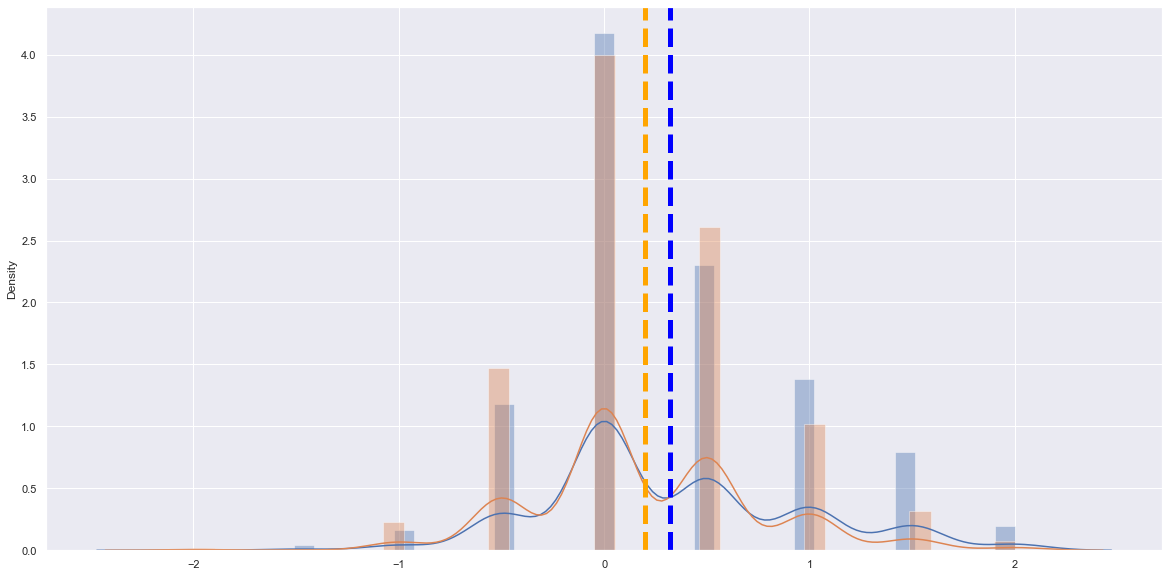

In [306]:
ame_fsa = ame['choice_dif_mean'].to_numpy()
eur_fsa = eur['choice_dif_mean'].to_numpy()

# Strongly disagree = -2
# Disagree = -1
# Neither disagree/agree = 0
# Agree = 1
# Strongly agree = 2

# Compare choice difficulty overall
plt.figure()
ax1 = sns.distplot(ame_fsa)
ax2 = sns.distplot(eur_fsa)
plt.axvline(np.mean(ame_fsa), color='blue', linestyle='dashed', linewidth=5) # American
plt.axvline(np.mean(eur_fsa), color='orange', linestyle='dashed', linewidth=5) # European

* As expected it was harder for americans to make recipe choices. 

## Compare variants

In [ ]:
# Condition 1: Nutriscore

In [70]:
stats.ttest_ind(c1v1_ame_fsa, c1v1_eur_fsa )

Ttest_indResult(statistic=4.559321148117638, pvalue=8.461497901792122e-06)

In [63]:
stats.ttest_ind(c1v2_ame_fsa, c1v2_eur_fsa )

Ttest_indResult(statistic=3.176272548431752, pvalue=0.0016999080586637238)

In [62]:
stats.ttest_ind(c1v3_ame_fsa, c1v3_eur_fsa )

Ttest_indResult(statistic=3.3902852916678605, pvalue=0.0008210356601818176)

* There is a statistically significant difference in choice difficulty between Americans and Europeans in the Nutriscore conditions. The difference is significant for all different rankings (health, random, popular). 

In [ ]:
# Condition 2: MTL

In [61]:
stats.ttest_ind(c2v1_ame_fsa, c2v1_eur_fsa )

Ttest_indResult(statistic=-0.42030680186151675, pvalue=0.6746994304786516)

In [64]:
stats.ttest_ind(c2v2_ame_fsa, c2v2_eur_fsa )

Ttest_indResult(statistic=-0.42030680186151675, pvalue=0.6746994304786516)

In [65]:
stats.ttest_ind(c2v3_ame_fsa, c2v3_eur_fsa )

Ttest_indResult(statistic=1.2516930655747047, pvalue=0.21210116072804808)

In [66]:
# Condition 3: No-label

In [67]:
stats.ttest_ind(c3v1_ame_fsa, c3v1_eur_fsa )

Ttest_indResult(statistic=-0.017955268340575033, pvalue=0.985691425184847)

In [68]:
stats.ttest_ind(c3v2_ame_fsa, c3v2_eur_fsa )

Ttest_indResult(statistic=1.2841936968391805, pvalue=0.2004824429612249)

In [69]:
stats.ttest_ind(c3v3_ame_fsa, c3v3_eur_fsa )

Ttest_indResult(statistic=1.375144742749468, pvalue=0.1705178052525819)

## Closer look at Condition 1 Nutriscore

In [307]:
# Popular ranking
print(c1v1_ame_fsa.mean())
print(c1v1_eur_fsa.mean())

0.45
0.21359223300970873


In [308]:
# Random ranking
print(c1v2_ame_fsa.mean())
print(c1v2_eur_fsa.mean())

0.4669421487603306
0.22596153846153846


In [309]:
# Health ranking
print(c1v3_ame_fsa.mean())
print(c1v3_eur_fsa.mean())

0.4146341463414634
0.12380952380952381


Americans found it harder to choose recipes in Condition 1 Nutriscore. 

* This might be because Americans have never seen the Nutriscore label before and are less accustomed to FoP labels
* The study did not include an explanation of what the Nutriscore label is, or how to interpret it. 

* The difference is largest with Health ranking! 

But why is the difference so big?... Look at respons in end survey, maybe they are more influenced by labels?
* More americans answered "Healthiness" on this questions: "3. Which factors influenced your recipe choices the most?"

So more Americans said they were influenced by the healthiness of the recipes while at the same time finding it harder to select recipes. Maybe this can be interpreted as the Nutriscore label making Americans more concoius of the healthiness of recipes thus making it harder for them to choose recipes, they have to break their automatic recipe selection patterns. 

In [136]:
# End survey
e1 = pd.read_csv("./Pro_1/endsurvey.csv")
e2 = pd.read_csv("./Pro_2/endsurvey.csv")
e3 = pd.read_csv("./Pro_3/endsurvey.csv")

# Clean label_q3 column
e1['label_q3'] = e1['label_q3'].str.strip('[]').astype(str)
e1['label_q3'] = e1['label_q3'].str.replace('"', '')
e1['label_q3'] = e1['label_q3'].astype(str)

e2['label_q3'] = e2['label_q3'].str.strip('[]').astype(str)
e2['label_q3'] = e2['label_q3'].str.replace('"', '')
e2['label_q3'] = e2['label_q3'].astype(str)

e3['label_q3'] = e3['label_q3'].str.strip('[]').astype(str)
e3['label_q3'] = e3['label_q3'].str.replace('"', '')
e3['label_q3'] = e3['label_q3'].astype(str)

# Condition 1
ame_end_1 = e1[e1['user_id'].isin(n1)]
eur_end_1 = e1[e1['user_id'].isin(n2)]

# Condition 2
ame_end_2 = e2[e2['user_id'].isin(n1)]
eur_end_2 = e2[e2['user_id'].isin(n2)]

# Condition 3
ame_end_3 = e3[e3['user_id'].isin(n1)]
eur_end_3 = e3[e3['user_id'].isin(n2)]


<AxesSubplot:>

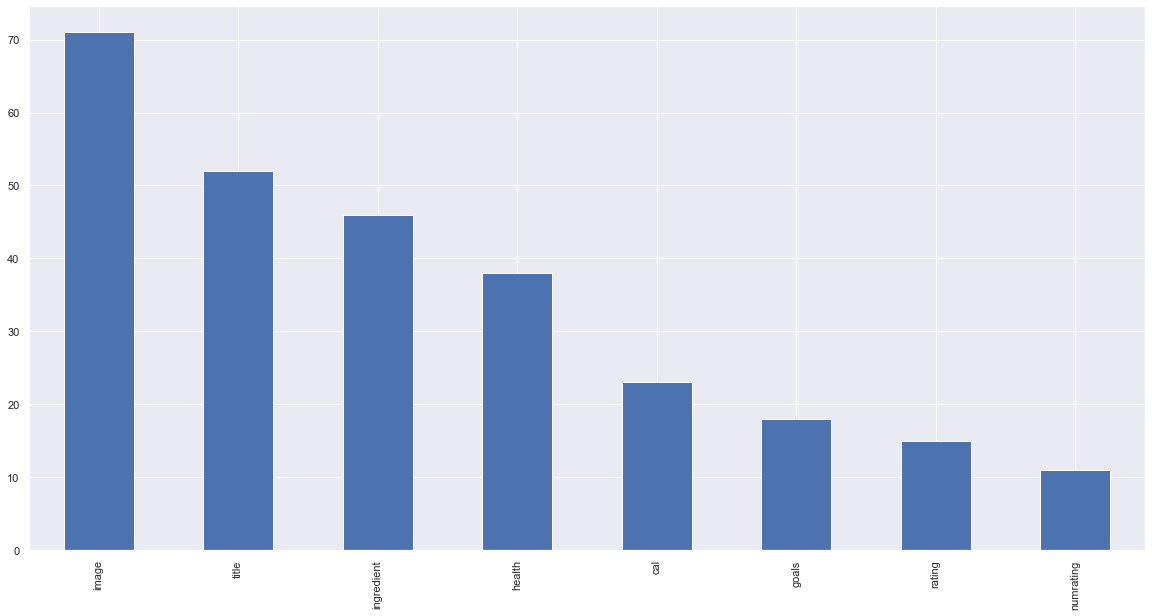

In [359]:
# Get end survey answers for americans and europeans 
ame_end['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8).plot(kind='bar')

# American seem to be more influenced by the nutriscore label in Condition 1. 

<AxesSubplot:>

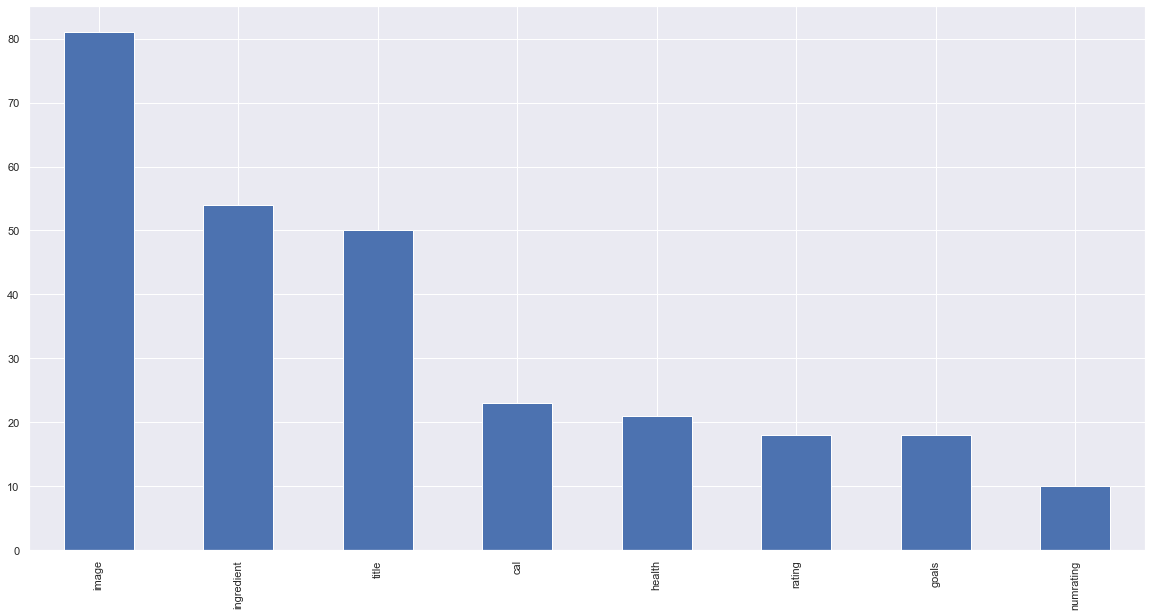

In [356]:
# Get end survey answers for americans and europeans 
eur_end['label_q3'].str.split(",",expand=True).stack().value_counts().nlargest(8).plot(kind='bar')

# Look at answers to q1 and q2 in end survey
1. It was easy to judge the healthiness of the recipes
2. The information provided was sufficient for me to make a decision


### Condition 1: Nutriscore

In [141]:
print(ame_end_1["label_q1"].to_numpy().mean())
print(eur_end_1["label_q1"].to_numpy().mean())

0.872
0.6074766355140186


In [137]:
stats.ttest_ind(ame_end_1["label_q1"], eur_end_1["label_q1"])

Ttest_indResult(statistic=2.5792691109675094, pvalue=0.010523695335576705)

* Overall Americans found it easier to judge the healthiness of the recipes in Condition 1: Nutriscore
* So they found it harder to select recipes, but at the same time they found the easier to judge the healthiness of the recipes. 

In [310]:
print(ame_end_1["label_q2"].to_numpy().mean())
print(eur_end_1["label_q2"].to_numpy().mean())

0.872
0.6074766355140186


In [139]:
stats.ttest_ind(ame_end_1["label_q2"], eur_end_1["label_q2"])

Ttest_indResult(statistic=2.5792691109675094, pvalue=0.010523695335576705)

* More americans found the information provided sufficient to make a decision. There was a SS difference between Americans and Europeans. 

### Condition 2: MTL

In [312]:
print(ame_end_2["label_q1"].to_numpy().mean())
print(eur_end_2["label_q1"].to_numpy().mean())

0.9912280701754386
0.865979381443299


In [313]:
stats.ttest_ind(ame_end_2["label_q1"], eur_end_2["label_q1"])

Ttest_indResult(statistic=1.3091923472163551, pvalue=0.19190672271060819)

In [314]:
print(ame_end_2["label_q2"].to_numpy().mean())
print(eur_end_2["label_q2"].to_numpy().mean())

0.9912280701754386
0.865979381443299


* It was easiest to judge the healthiness of the recipes in condition 2: MTL. 

### Condition 3: No-label

In [145]:
print(ame_end_3["label_q1"].to_numpy().mean())
print(eur_end_3["label_q1"].to_numpy().mean())

0.5213675213675214
0.45544554455445546


* It was hardest to judge the healthiness of the recipes in condition 3: No-label

### Compare end survey answers between conditions

In [316]:
f_oneway(e1["label_q2"], e2["label_q2"], e3["label_q2"])

F_onewayResult(statistic=17.620978681695192, pvalue=3.368894457935565e-08)

In [146]:
stats.ttest_ind(e1["label_q2"], e2["label_q2"])

Ttest_indResult(statistic=-2.862685709219892, pvalue=0.004382442100359467)

In [147]:
stats.ttest_ind(e2["label_q2"], e3["label_q2"])

Ttest_indResult(statistic=6.0052996649116785, pvalue=3.7584875468036454e-09)

In [148]:
stats.ttest_ind(e1["label_q2"], e3["label_q2"])

Ttest_indResult(statistic=3.0329758906240873, pvalue=0.002552142507624364)

## Account for personal factors in the end survey questions
* Did cooking experience influence results? 

# Repeated measure ANOVA, control for bias

In [117]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA Nutriscore
print(AnovaRM(data=s1, depvar='choice_dif_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  5.7941 2.0000 476.0000 0.0033



In [119]:
#perform the repeated measures ANOVA MTL
print(AnovaRM(data=s2, depvar='choice_dif_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  0.0905 2.0000 469.0000 0.9135



In [120]:
#perform the repeated measures ANOVA No-label
print(AnovaRM(data=s3, depvar='choice_dif_mean', subject='user_id', within=['variant'], aggregate_func=np.mean).fit())

                Anova
        F Value Num DF  Den DF  Pr > F
--------------------------------------
variant  1.6818 2.0000 476.0000 0.1871

